In [55]:
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn import preprocessing

In [26]:
data = pd.read_csv('players.csv')


In [27]:
data.dropna(axis=0,inplace=True)
data.reset_index(inplace=True)

In [29]:
nba_cols = data.columns[10:22]
ncaa_cols = data.columns[23:]
ncaa_cols

Index(['NCAA__3ptapg', 'NCAA__3ptpct', 'NCAA__3ptpg', 'NCAA_fgapg',
       'NCAA_fgpct', 'NCAA_fgpg', 'NCAA_ft', 'NCAA_ftapg', 'NCAA_ftpg',
       'NCAA_games', 'NCAA_ppg'],
      dtype='object')

<Axes: >

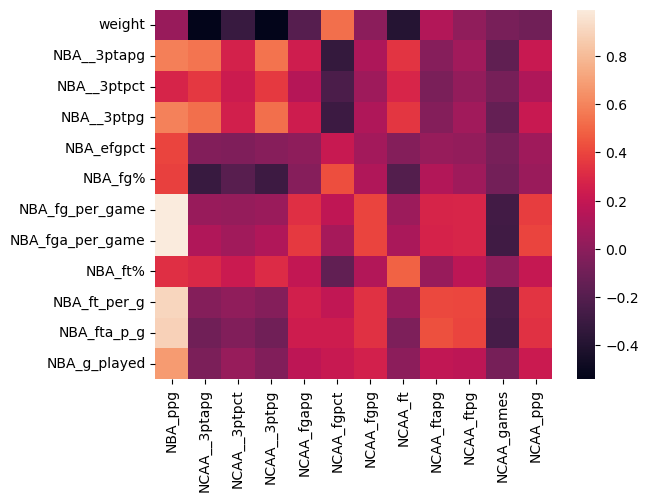

In [30]:
c = data.iloc[:,10:].corr()
sns.heatmap(c.iloc[0:12,12:24])

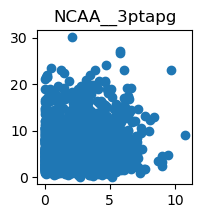

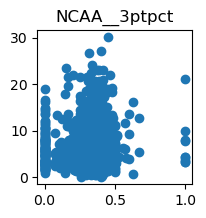

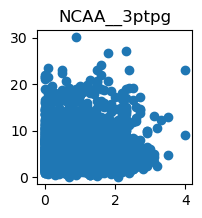

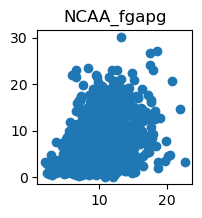

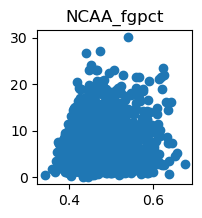

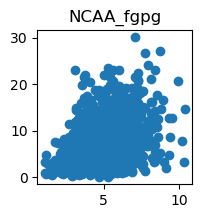

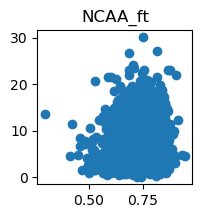

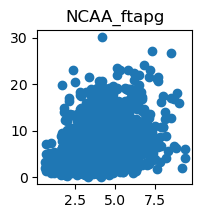

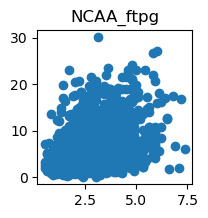

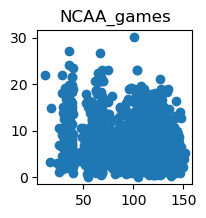

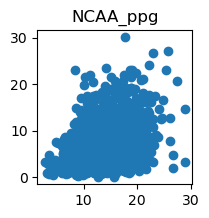

In [31]:
for c in ncaa_cols:
    plt.figure(figsize=(2,2))
    plt.scatter(data[c],data['NBA_ppg'])
    plt.title(c)
    plt.show()

In [32]:
reg = LinearRegression()
reg.fit(data[['NCAA_fgapg','NCAA_ftapg']],data['NBA_ppg'])
reg.score(data[['NCAA_fgapg','NCAA_ftapg']],data['NBA_ppg'])

0.11937449399827615

In [33]:
#create 3 dim PCA to describe players in ncaa

pca = PCA(n_components=3)
pca.fit(data[ncaa_cols])

PCA(n_components=3)

In [34]:
dim1 = pca.fit_transform(data[ncaa_cols])[:,0]
dim2 = pca.fit_transform(data[ncaa_cols])[:,1]
dim3 = pca.fit_transform(data[ncaa_cols])[:,2]

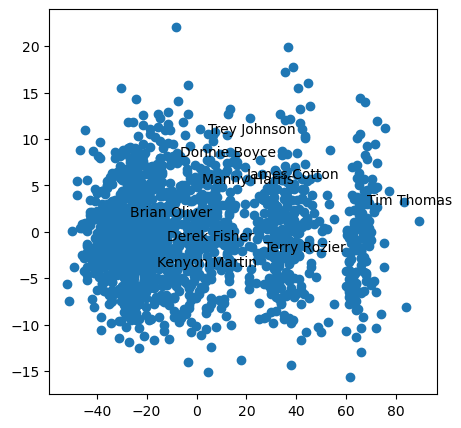

In [23]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
ax.scatter(dim1, dim2)

for i in range(1,10):
    l = i*150
    plt.annotate(data.loc[l,'name'],(dim1[l],dim2[l]))

In [41]:
len(data['NBA_ppg'])
dim1.reshape(-1,1)

array([[ 36.70056428],
       [ 72.3921632 ],
       [ 12.15776266],
       ...,
       [ 28.19050263],
       [-16.90254826],
       [ -4.12111688]])

In [43]:
#use pca as regression.  well that's worse
reg = LinearRegression()
reg.fit(dim1.reshape(-1,1),data['NBA_ppg'])
reg.score(dim1.reshape(-1,1),data['NBA_ppg'])

0.07536006156222197

(array([331., 487., 338., 181., 110.,  48.,  32.,  12.,   2.,   2.]),
 array([ 0.  ,  3.01,  6.02,  9.03, 12.04, 15.05, 18.06, 21.07, 24.08,
        27.09, 30.1 ]),
 <BarContainer object of 10 artists>)

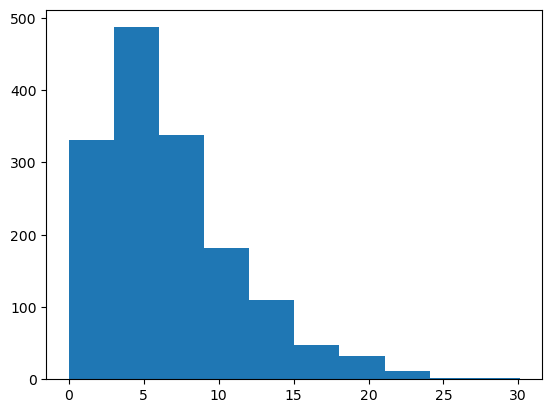

In [25]:
#distribution of nba points per games
plt.hist(data['NBA_ppg'])

In [44]:
#look at top 25 percent to see if that's less noisy
data['NBA_ppg'].quantile(.75)

9.1

In [45]:
top_25 = data[data['NBA_ppg']>9.1]

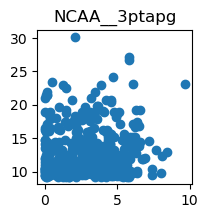

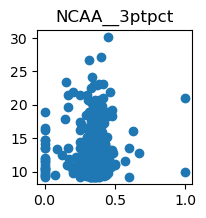

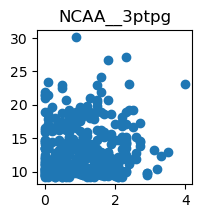

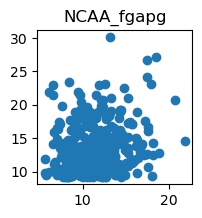

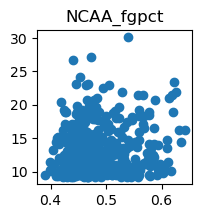

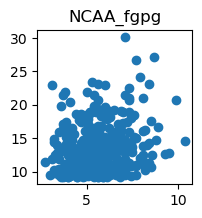

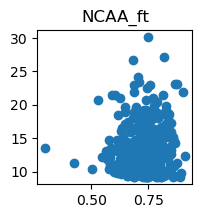

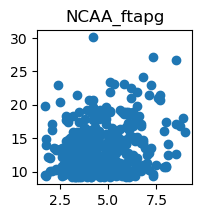

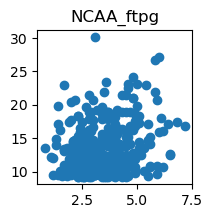

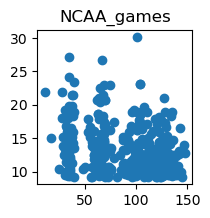

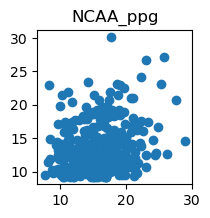

In [46]:
for c in ncaa_cols:
    plt.figure(figsize=(2,2))
    plt.scatter(top_25[c],top_25['NBA_ppg'])
    plt.title(c)
    plt.show()

In [47]:
lasso = Lasso()
lasso.fit(top_25[ncaa_cols],top_25['NBA_ppg'])
lasso.coef_

#lasso results: only NCAA games (negative relationship) and NCAA ppg (positive) were significant

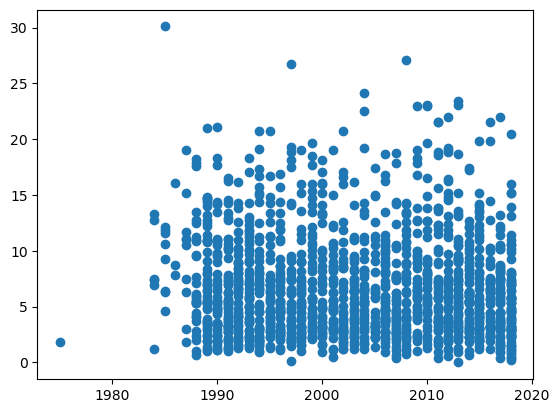

In [50]:
plt.scatter(data['active_from'],data['NBA_ppg'])

In [51]:
#look at only players that played a "significant" number of nba games
games = data[data['NBA_g_played']>50]

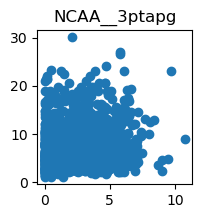

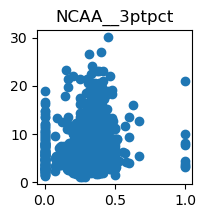

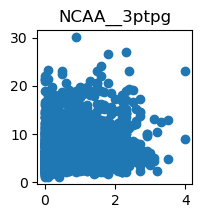

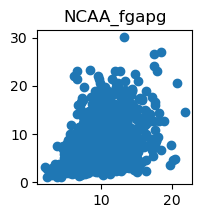

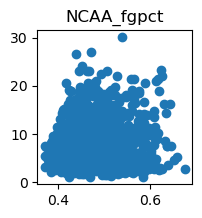

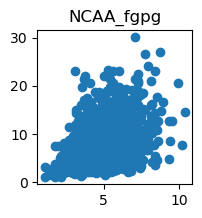

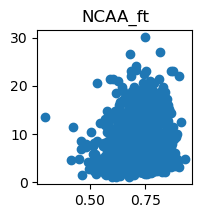

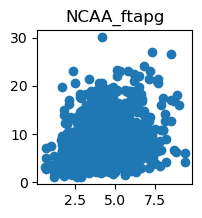

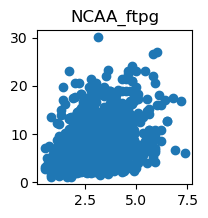

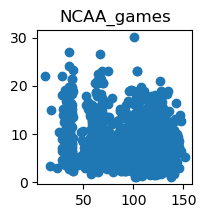

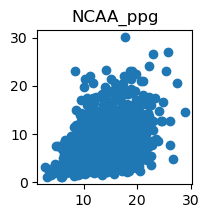

In [52]:
for c in ncaa_cols:
    plt.figure(figsize=(2,2))
    plt.scatter(games[c],games['NBA_ppg'])
    plt.title(c)
    plt.show()

In [54]:
linear = LinearRegression()
linear.fit(games[ncaa_cols],games['NBA_ppg'])
linear.coef_

array([  1.01671485,   1.38312445,  -0.9696417 ,  -1.49051033,
       -10.57254059,   4.81049219,  -3.04068823,  -1.22717646,
         2.64453454,  -0.03396282,  -0.5730968 ])

In [56]:
#what happens if data is scaled
scaler = preprocessing.MinMaxScaler()
data[ncaa_cols] = scaler.fit_transform(data[ncaa_cols])
data[nba_cols] = scaler.fit_transform(data[nba_cols])

In [58]:
linear.fit(data[ncaa_cols],data['NBA_ppg'])
linear.coef_

array([  6.07832493,   0.76526456,  -1.33829139, -25.28791792,
        -1.45518198,  31.65295013,  -1.73926898,  -7.24043026,
        11.69812755,  -4.62108576,  -3.63042489])

In [60]:
#play by play data - need to figure out how to give this to you because file's too large

nba = pd.read_csv('nba_playbyplay_2024.csv')
nba.head(5)

In [62]:
nba.columns

Index(['game_play_number', 'id', 'sequence_number', 'type_id', 'type_text',
       'away_score', 'home_score', 'period_number', 'clock_display_value',
       'scoring_play', 'score_value', 'team_id', 'athlete_id_1',
       'athlete_id_2', 'athlete_id_3', 'wallclock', 'shooting_play', 'game_id',
       'season', 'season_type', 'home_team_id', 'home_team_abbrev',
       'away_team_id', 'away_team_abbrev', 'qtr', 'time', 'half', 'game_half',
       'lead_qtr', 'lead_half', 'start_quarter_seconds_remaining',
       'start_half_seconds_remaining', 'start_game_seconds_remaining',
       'end_quarter_seconds_remaining', 'end_half_seconds_remaining',
       'end_game_seconds_remaining', 'period', 'lag_qtr', 'lag_half',
       'coordinate_x', 'coordinate_y', 'game_date', 'game_date_time',
       'type_abbreviation'],
      dtype='object')